## Qiskit Gradient Framework

1. Import necessary libraries and classes

In [7]:
# imports numpy and matplotlib
import numpy as np
import matplotlib as plt

# import operators
from qiskit.opflow import Z, X, I, StateFn, CircuitStateFn, SummedOp
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian

# circuit imports
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector, ParameterExpression

# import effecient SU2 parametrized circuit from library
from qiskit.circuit.library import EfficientSU2

2. First order gradients

* With respect to Measurement operator parameters

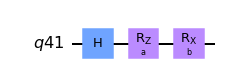

In [8]:
# create the parameters of the circuit
param_a = Parameter('a')
param_b = Parameter('b')

#  create the circuit
quantum_register = QuantumRegister(1) # 1 qubit
circuit = QuantumCircuit(quantum_register)

# apply the hadamard gate and the qubit rotations using parameters as the angles of rotation
circuit.h(quantum_register)
circuit.rz(param_a, 0)
circuit.rx(param_b, 0)

%matplotlib inline
circuit.draw('mpl')

In [9]:
# initialize the Hamiltonian operator / observable
H = 2 * X + Z

operator = ~StateFn(H) @ CircuitStateFn(circuit, coeff = 1.)

print(operator)

ComposedOp([
  OperatorMeasurement(2.0 * X
  + 1.0 * Z),
  CircuitStateFn(
       ┌───┐┌───────┐┌───────┐
  q41: ┤ H ├┤ Rz(a) ├┤ Rx(b) ├
       └───┘└───────┘└───────┘
  )
])


In [10]:
params = [param_a, param_b]

# add some initial values to the parameters
values = {param_a: np.pi / 4, param_b: np.pi}

# create the gradient
grad = Gradient().convert(operator = operator, params = params)

print(grad)

ListOp([
  SummedOp([
    ComposedOp([
      OperatorMeasurement(Z),
      CircuitStateFn(
           ┌───┐┌─────────────┐┌───────┐┌───┐
      q41: ┤ H ├┤ Rz(a + π/2) ├┤ Rx(b) ├┤ H ├
           └───┘└─────────────┘└───────┘└───┘
      )
    ]),
    -1.0 * ComposedOp([
      OperatorMeasurement(Z),
      CircuitStateFn(
           ┌───┐┌─────────────┐┌───────┐┌───┐
      q41: ┤ H ├┤ Rz(a - π/2) ├┤ Rx(b) ├┤ H ├
           └───┘└─────────────┘└───────┘└───┘
      )
    ]),
    0.5 * ComposedOp([
      OperatorMeasurement(Z),
      CircuitStateFn(
           ┌───┐┌─────────────┐┌───────┐
      q41: ┤ H ├┤ Rz(a + π/2) ├┤ Rx(b) ├
           └───┘└─────────────┘└───────┘
      )
    ]),
    -0.5 * ComposedOp([
      OperatorMeasurement(Z),
      CircuitStateFn(
           ┌───┐┌─────────────┐┌───────┐
      q41: ┤ H ├┤ Rz(a - π/2) ├┤ Rx(b) ├
           └───┘└─────────────┘└───────┘
      )
    ])
  ]),
  SummedOp([
    ComposedOp([
      OperatorMeasurement(Z),
      CircuitStateFn(
         

In [11]:
# then assign the parameters and get the gradient
grad_result = grad.assign_parameters(values).eval()

print('Gradient', grad_result)

Gradient [(-1.414213562373094+0j), (-0.7071067811865474+0j)]
